## https://www.kaggle.com/pestipeti/bengali-quick-eda

In [1]:
import warnings
warnings.filterwarnings("ignore")

import os
import pandas as pd
import numpy as np
import PIL.Image as Image, PIL.ImageDraw as ImageDraw, PIL.ImageFont as ImageFont

import plotly.graph_objects as go
import matplotlib.pyplot as plt

%matplotlib inline

pd.options.display.max_rows = 10000
#pd.options.display.max_columns = None
pd.options.display.max_columns = 1000
pd.options.display.max_colwidth = 100

In [2]:
HEIGHT = 137
WIDTH = 236

In [3]:
def load_as_npa(file):
    df = pd.read_parquet(file)
    return df.iloc[:, 0], df.iloc[:, 1:].values.reshape(-1, HEIGHT, WIDTH)

def image_from_char(char):
    image = Image.new('RGB', (WIDTH, HEIGHT))
    draw = ImageDraw.Draw(image)
    myfont = ImageFont.truetype('../input/hind_siliguri_normal_500.ttf', 120)
    w, h = draw.textsize(char, font=myfont)
    draw.text(((WIDTH-w)/2,(HEIGHT-h)/2), char, font=myfont)
    return image

In [4]:
image_ids0, images0 = load_as_npa('../input/train_image_data_0.parquet')

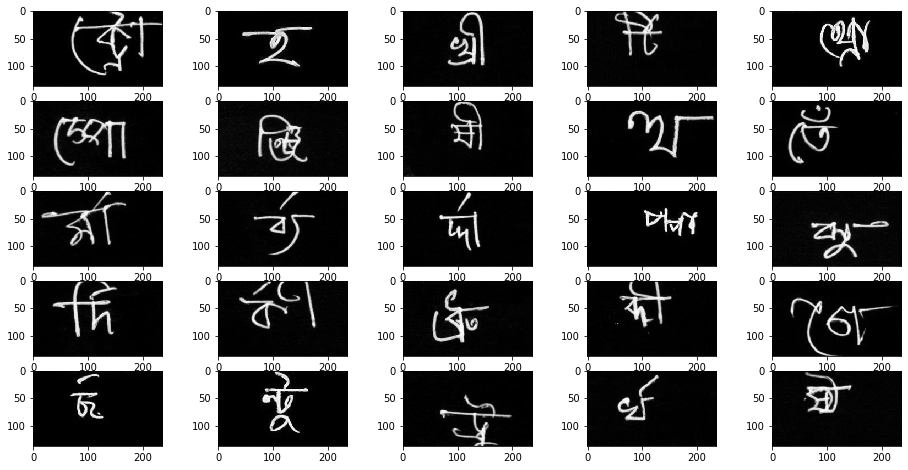

In [5]:
f, ax = plt.subplots(5, 5, figsize=(16,8))
ax = ax.flatten()

for i in range(25):
    ax[i].imshow(images0[i], cmap='Greys')

In [6]:
train_df = pd.read_csv('../input/train.csv')
train_df.head()

image_id  grapheme_root  vowel_diacritic  consonant_diacritic grapheme
0  Train_0             15                9                    5   ক্ট্রো
1  Train_1            159                0                    0        হ
2  Train_2             22                3                    5     খ্রী
3  Train_3             53                2                    2     র্টি
4  Train_4             71                9                    5     থ্রো

In [7]:
train_df.shape

(200840, 5)

In [8]:
class_map_df = pd.read_csv('../input/class_map.csv')
class_map_df.head()

component_type  label component
0  grapheme_root      0         ং
1  grapheme_root      1         ঃ
2  grapheme_root      2         অ
3  grapheme_root      3         আ
4  grapheme_root      4         ই

In [9]:
print(f'Number of unique grapheme_root: {train_df.grapheme_root.nunique()}')

Number of unique grapheme_root: 168


In [10]:
fig = go.Figure(data=[go.Histogram(x=train_df['grapheme_root'])])
fig.update_layout(title_text='grapheme_root values')
fig.show()

In [11]:
x = train_df['grapheme_root'].value_counts().sort_values()[-20:].index
y = train_df['grapheme_root'].value_counts().sort_values()[-20:].values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='Most common grapheme_root values')
fig.show()

In [12]:
common_gr = class_map_df[(class_map_df['component_type']=='grapheme_root')&(class_map_df['label'].isin(x))]['component']

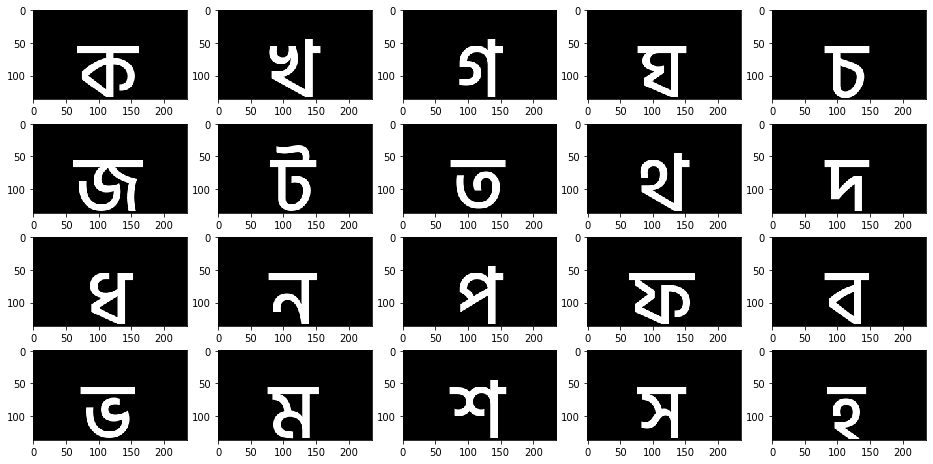

In [13]:
f, ax = plt.subplots(4, 5, figsize=(16,8))
ax = ax.flatten()

for i in range(20):
    ax[i].imshow(image_from_char(common_gr.values[i]), cmap='Greys')

In [14]:
x = train_df['grapheme_root'].value_counts().sort_values()[:20].index
y = train_df['grapheme_root'].value_counts().sort_values()[:20].values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='Least common grapheme_root values')
fig.show()

In [15]:
notcommon_gr = class_map_df[(class_map_df['component_type']=='grapheme_root')&(class_map_df['label'].isin(x))]['component']

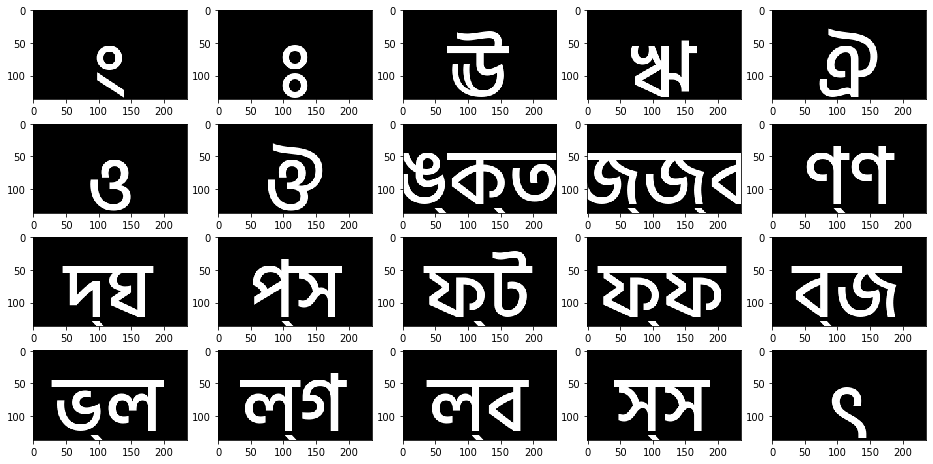

In [16]:
f, ax = plt.subplots(4, 5, figsize=(16,8))
ax = ax.flatten()

for i in range(20):
    ax[i].imshow(image_from_char(notcommon_gr.values[i]), cmap='Greys')

In [17]:
train_df['vowel_diacritic'].nunique()

11

In [19]:
x = train_df['vowel_diacritic'].value_counts().sort_values().index
y = train_df['vowel_diacritic'].value_counts().sort_values().values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='vowel_diacritic values')
fig.show()

In [20]:
vowels = class_map_df[(class_map_df['component_type']=='vowel_diacritic')&(class_map_df['label'].isin(x))]['component']

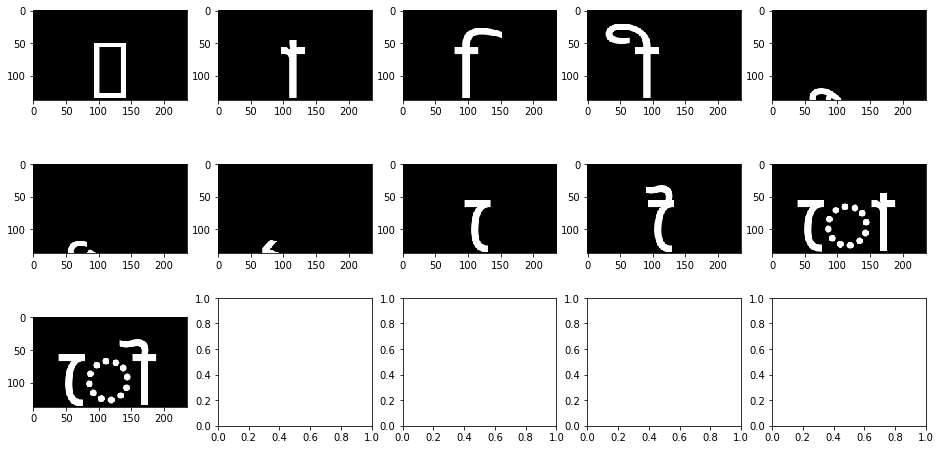

In [21]:
f, ax = plt.subplots(3, 5, figsize=(16,8))
ax = ax.flatten()

for i in range(15):
    if i < len(vowels):
        ax[i].imshow(image_from_char(vowels.values[i]), cmap='Greys')

In [22]:
train_df['consonant_diacritic'].nunique()

7

In [23]:
x = train_df['consonant_diacritic'].value_counts().sort_values().index
y = train_df['consonant_diacritic'].value_counts().sort_values().values
fig = go.Figure(data=[go.Bar(x=x, y=y)])
fig.update_layout(title_text='consonant_diacritic values')
fig.show()

In [24]:
consonants = class_map_df[(class_map_df['component_type']=='consonant_diacritic')&(class_map_df['label'].isin(x))]['component']

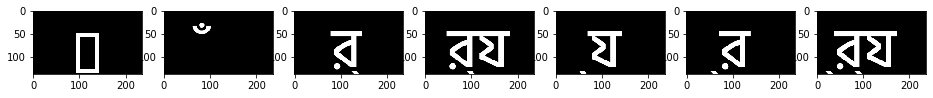

In [25]:
f, ax = plt.subplots(1, 7, figsize=(16,8))
ax = ax.flatten()

for i in range(7):
    ax[i].imshow(image_from_char(consonants.values[i]), cmap='Greys')

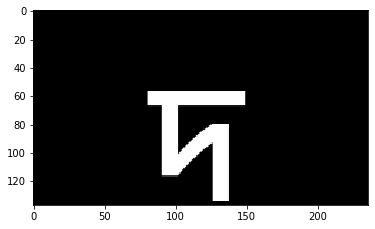

In [26]:
train_df = train_df[0:50000]

# Most common grapheme_root
gr_root_component = class_map_df[(class_map_df['component_type']=='grapheme_root')&(class_map_df['label']==72)]['component']
plt.imshow(image_from_char(gr_root_component[72]), cmap='Greys')
plt.show()

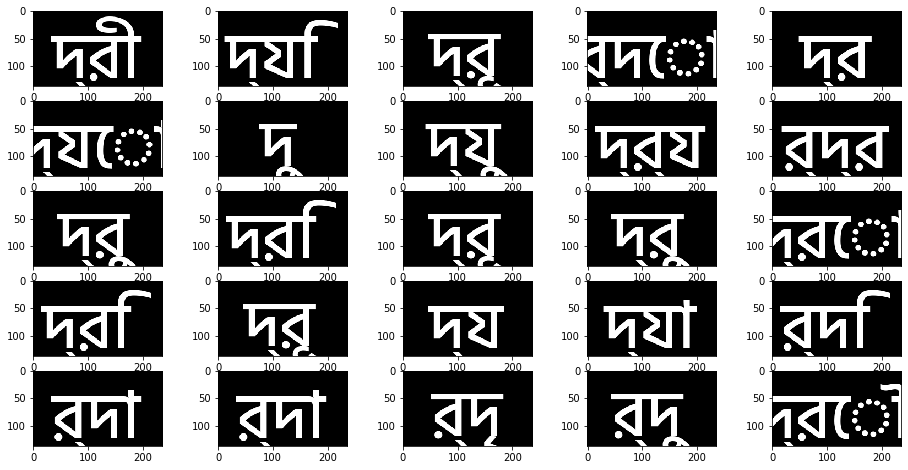

In [30]:
samples = train_df[train_df['grapheme_root']==72].sample(n=25)

f, ax = plt.subplots(5, 5, figsize=(16,8))
ax = ax.flatten()
k = 0
for i, row in samples.iterrows():
    ax[k].imshow(image_from_char(row['grapheme']), cmap='Greys')
    k = k + 1

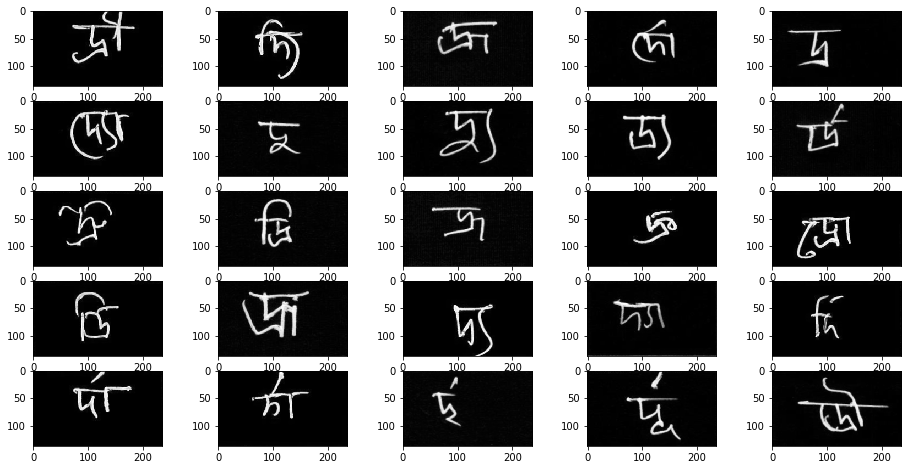

In [31]:
f, ax = plt.subplots(5, 5, figsize=(16,8))
ax = ax.flatten()
k = 0
for i, row in samples.iterrows():
    ax[k].imshow(images0[i], cmap='Greys')
    k = k + 1

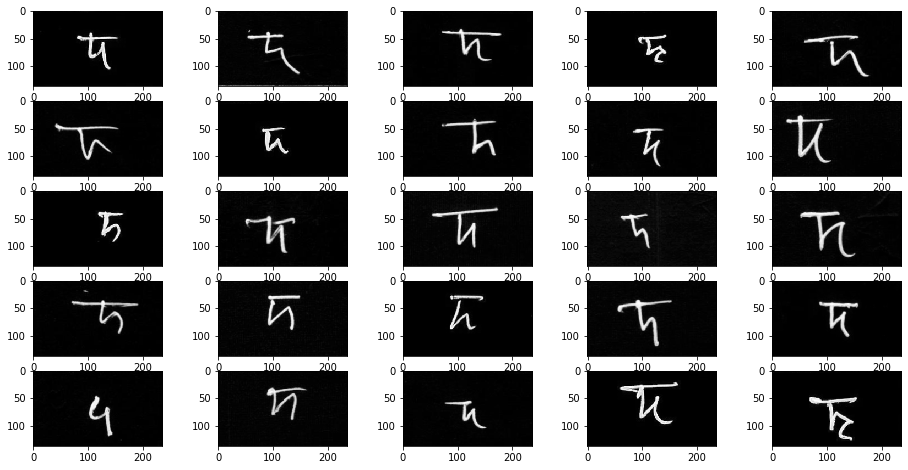

In [33]:
samples = train_df[
    (train_df['grapheme_root']==72) &
    (train_df['vowel_diacritic']==0) &
    (train_df['consonant_diacritic']==0)
].sample(n=25)

f, ax = plt.subplots(5, 5, figsize=(16,8))
ax = ax.flatten()
k = 0
for i, row in samples.iterrows():
    ax[k].imshow(images0[i], cmap='Greys')
    k = k + 1